## Project ( Movie Correlation Explore)

### Introduction

This dataset is about movie, include movie basic information (name, genre, release year, etc.), cost, budget and gross. We will use this dataset to explore the correlation between these variables.

### Data Cleaning

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [2]:
# Read in the data
df=pd.read_csv('movies.csv')

In [3]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Check how many records in this dataset
df.shape

(7668, 15)

In [5]:
# Let's see if there is any missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# Drop records with null value in rating, budget and gross columns
df=df.dropna(subset=['rating','budget','gross'])

In [7]:
# Check new shape
df.shape

(5424, 15)

In [8]:
# Recheck if there is missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0003687315634218289%
runtime - 0.00018436578171091445%


In [9]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# Change data type
df['budget'] = df['budget'].astype('int')
df['gross'] = df.gross.astype('int')

In [13]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0


In [15]:
# Check if there is duplicate records
df.duplicated().sum()

0

### Data Exploretion

Let's start with budget and gross, scatter plot is a good way to show the correlation

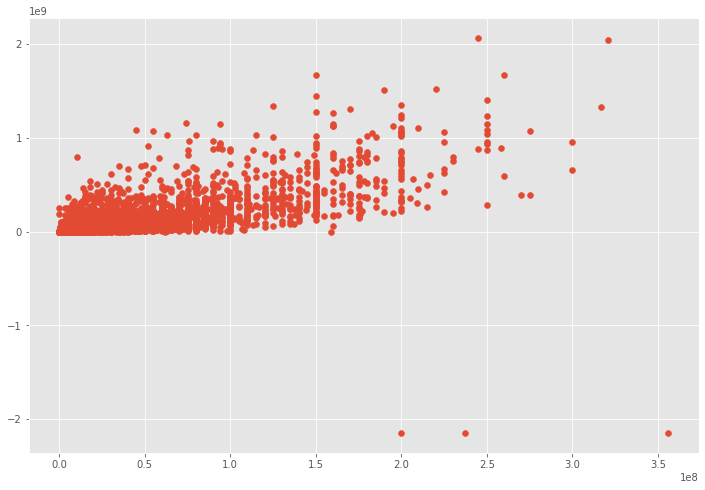

In [17]:
# Scatter plot with budget vs gross
plt.scatter(data=df, x='budget', y='gross')
plt.show()

Seems there are some outliers, let's remove these outliers

In [18]:
# Check the max gross value
df.gross.max()

2069521700

In [19]:
df.gross.sort_values()

3045   -2147483648
7445   -2147483648
5445   -2147483648
3203           309
272           2270
           ...    
6043    1518815515
6653    1670516444
7480    1670727580
7244    2048359754
6663    2069521700
Name: gross, Length: 5424, dtype: int32

From these sort values, we know that only three outliers, let's set y limit to remove the outlier

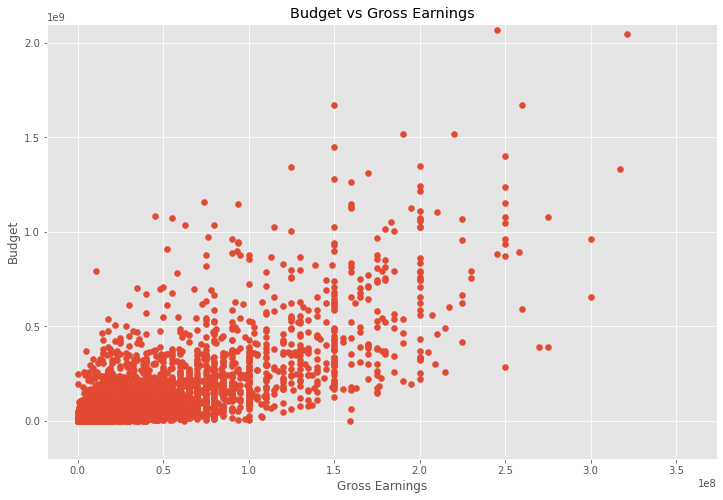

In [20]:
plt.scatter(data=df, x='budget', y='gross')
plt.ylim(-200000000, 2100000000)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')

plt.show()

The scatter plot above shows there is relation between budget and gross. Let's use sns.regplot to have a better observation

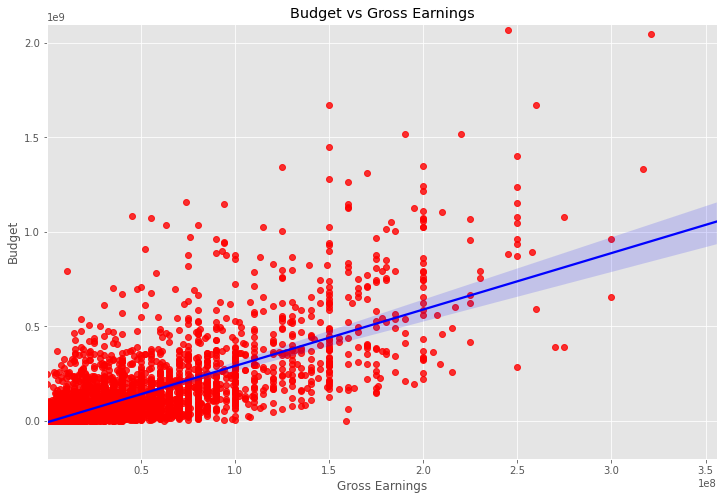

In [22]:
# Plot budget vs gross using seaborn
sns.regplot(data=df, x='budget', y='gross', scatter_kws={"color":'red'}, line_kws={"color":'blue'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.ylim(-200000000, 2100000000)
plt.show()

In [23]:
# Let's start looking at correlation

In [29]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056506,0.206161,0.327961,0.267707,0.075173
score,0.056506,1.000000,0.474349,0.072155,0.201242,0.414145
votes,0.206161,0.474349,1.000000,0.439757,0.550714,0.352331
budget,0.327961,0.072155,0.439757,1.000000,0.669231,0.318718
gross,0.267707,0.201242,0.550714,0.669231,1.000000,0.223706
runtime,0.075173,0.414145,0.352331,0.318718,0.223706,1.000000


In [28]:
# High correlation between budget and gross

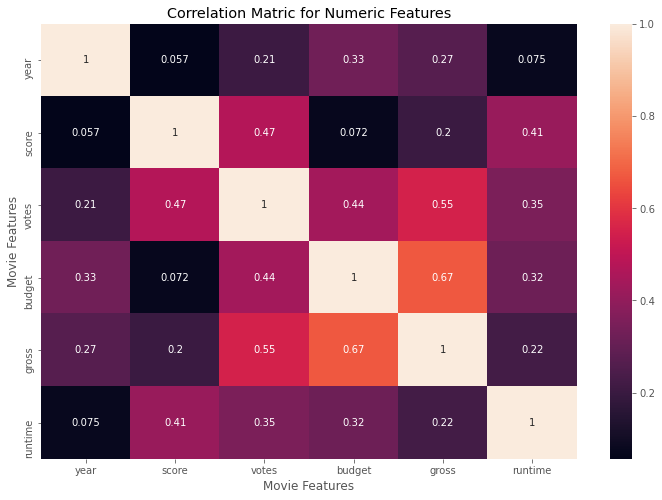

In [32]:
correlation_matrix=df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

Let's look at company and gross

In [36]:
# Looks at company
df.company.nunique()

1475

In [37]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4695,6,6,1980,1304,8.4,927000.0,1797,2834,699,46,19000000,46998772,1426,146.0
1,3932,6,1,1980,1127,5.8,65000.0,1579,1159,214,47,4500000,58853106,452,104.0
2,3643,4,0,1980,1359,8.7,1200000.0,757,1819,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1414,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,352,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2391,1812,47,90000000,426505244,452,124.0
7649,3558,4,0,2020,713,6.5,102000.0,852,2310,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,904,5.6,53000.0,1811,2829,1470,47,175000000,245487753,1397,101.0
7651,3981,4,1,2020,758,6.8,42000.0,294,2092,640,6,135000000,111105497,12,100.0


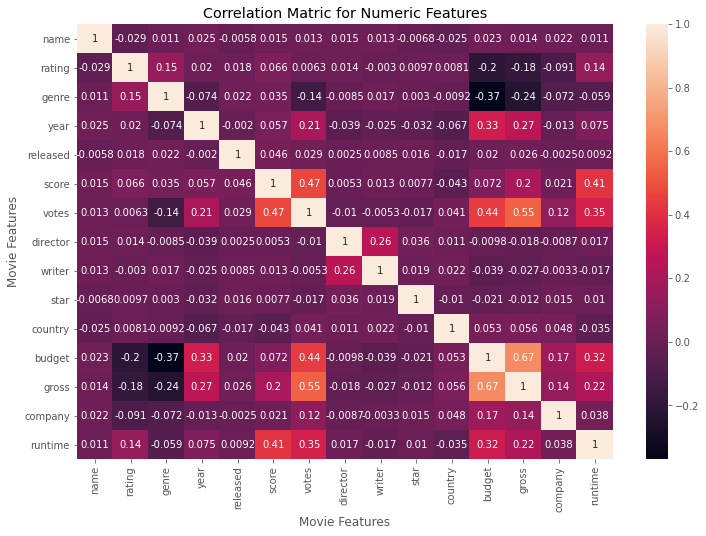

In [38]:
correlation_matrix=df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [39]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029271,0.010838,0.025441,-0.005783,0.014521,0.012585,0.015320,0.013143,-0.006788,-0.025467,0.023336,0.014044,0.021592,0.010949
rating,-0.029271,1.000000,0.147569,0.020085,0.018011,0.066335,0.006321,0.014381,-0.002966,0.009693,0.008061,-0.203531,-0.180494,-0.091306,0.140886
genre,0.010838,0.147569,1.000000,-0.073532,0.021952,0.035126,-0.135954,-0.008507,0.016969,0.003026,-0.009185,-0.368521,-0.238566,-0.071608,-0.059367
year,0.025441,0.020085,-0.073532,1.000000,-0.002033,0.056506,0.206161,-0.038676,-0.025486,-0.031559,-0.066833,0.327961,0.267707,-0.013187,0.075173
released,-0.005783,0.018011,0.021952,-0.002033,1.000000,0.046131,0.028810,0.002499,0.008480,0.015881,-0.017225,0.019835,0.025619,-0.002539,0.009172
score,0.014521,0.066335,0.035126,0.056506,0.046131,1.000000,0.474349,0.005294,0.012896,0.007683,-0.043207,0.072155,0.201242,0.021241,0.414145
votes,0.012585,0.006321,-0.135954,0.206161,0.028810,0.474349,1.000000,-0.010499,-0.005288,-0.017377,0.041443,0.439757,0.550714,0.118850,0.352331
director,0.015320,0.014381,-0.008507,-0.038676,0.002499,0.005294,-0.010499,1.000000,0.261595,0.036372,0.011209,-0.009814,-0.017922,-0.008712,0.017437
writer,0.013143,-0.002966,0.016969,-0.025486,0.008480,0.012896,-0.005288,0.261595,1.000000,0.018941,0.022496,-0.039307,-0.026627,-0.003287,-0.017340
star,-0.006788,0.009693,0.003026,-0.031559,0.015881,0.007683,-0.017377,0.036372,0.018941,1.000000,-0.010125,-0.021159,-0.011631,0.014958,0.010312


In [40]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.029271
         genre       0.010838
         year        0.025441
         released   -0.005783
                       ...   
runtime  country    -0.034514
         budget      0.318718
         gross       0.223706
         company     0.037797
         runtime     1.000000
Length: 225, dtype: float64

In [42]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.368521
budget   genre     -0.368521
genre    gross     -0.238566
gross    genre     -0.238566
rating   budget    -0.203531
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [43]:
high_corr=sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.550714
votes     gross       0.550714
budget    gross       0.669231
gross     budget      0.669231
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

From the heatmap and data above, we could know that:
1, Votes and budget have the highest correlation to gross earnings

2, Company has no correlation 